<a href="https://colab.research.google.com/github/Hugo-Mn/Data-Acquisition-project/blob/main/Colab_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Acquisition-project

## Table of Contents

- [Dataset Overview](#dataset)
  - [1. Main Dataset](#1-main-dataset)
  - [2. Web Data](#2-web-data)
  - [3. Combined Dataset](#3-combined-dataset-structure)
- [Visualization](#4-visualization)
- [ChatGPT Prompts and Responses](#chatgpt-prompts-and-responses)
- [Execution Instructions](#execution-instructions)
- [Setup Guide](./SETUP.md)

## Dataset

This project aims to merge two datasets: one from a CSV file and another from web scraping.

## ChatGPT Prompts and Responses

### Prompt 1: Grammar Correction

**Question:** Fix grammar in the text while keeping the same meaning

**Response:**
The text was corrected while maintaining its original meaning and analysis of the relationship between population and CO2 emissions.

**Example**
*prompt:*
```mardown
### Growing Population and CO2 Emissions
If you have plotted some graphs and compared a few countries, you have already noticed that the growing population is not a really influential factor in the emissions of CO2.
The best example possible is to plot a graph with *Germany*, *Bulgaria* and *Zambia*: You can see for *Paraguay* when the population number and the CO2 emissions stay close to each other across time, the simple observation could be to say that population is the main influence in CO2 Emissions...
but observe the plots for *Germany* and *Zambia*: you can see that *Germany's* emissions still decrease but its population grows, and for *Zambia* it's more remarkable because the CO2 emissions decrease in 2000 to jump in 2010/2015 and reach a stable level close to his population number.
So you can observe this for every country in the world, the main factor in CO2 emissions can be the population but also all the laws and how the governments fight against it.

```

*Answer:*
```mardown
### Growing Population and CO₂ Emissions\n

If you have plotted different graphs and compared several countries, you may have already noticed that a growing population is not necessarily the main factor influencing CO₂ emissions. A good example is to look at a graph including *Germany*, *Bulgaria*, and *Zambia*.\n

For *Paraguay*, the population curve and the CO₂ emissions curve stay relatively close across time. At first sight, this could suggest that population is the primary driver of CO₂ emissions. However, when observing the plots for *Germany* and *Zambia*, this assumption no longer holds: *Germany’s* emissions continue to decrease even though its population grows, and *Zambia* shows an even more interesting pattern, with emissions decreasing around 2000 before rising again in 2010/2015 and reaching a stable level—yet population keeps increasing.\n

This shows that for every country in the world, CO₂ emissions may be influenced by population, but also by many other factors such as environmental laws, energy policies, industrial development, and the efforts made by governments to fight climate change.\n

```

### Prompt 2: Dataset Structure

**Question:** Create a table structure for the main dataset columns

**Response:**

| Column           | Description                              |
|-----------------|------------------------------------------|
| rank            | Country ranking by population            |
| cca3            | Three-letter country code               |
| country         | Country name                            |
| continent       | Continent name                          |
| 2023 population | Population in 2023                      |
| 2022 population | Population in 2022                      |
| 2020 population | Population in 2020                      |
| 2015 population | Population in 2015                      |
| 2010 population | Population in 2010                      |
| 2000 population | Population in 2000                      |
| 1990 population | Population in 1990                      |
| 1980 population | Population in 1980                      |
| 1970 population | Population in 1970                      |
| area (km²)      | Country area in square kilometers       |
| density (km²)   | Population density (people per km²)     |
| growth rate     | Population growth rate                  |
| world percentage| Percentage of world population          |

### Prompt 3: Axis Formatting

**Question:** How to format axis values in millions instead of using scientific notation?

**Response:**

Function to format axis values in millions:

```python
@staticmethod
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'
```
```python

  from matplotlib.ticker as ticker
```

Implementation in the plot:

```python
    ax_pop.plot(years_int, population, marker="o", linestyle="-",
                color="tab:blue", label=f"{country} — Population")
    ax_pop.set_ylabel("Population", color="tab:blue")
    ax_pop.tick_params(axis="y", labelcolor="tab:blue")
    ax_pop.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
```

### Prompt 4: Normalizing World Population and World CO₂ Emissions

**Question:**  
How can I normalize the global population and global CO₂ emissions so they can be plotted on the same scale?

**Response:**  
To compare global population and CO₂ emissions on the same plot, both metrics need to be normalized so that they share the same range. The most common method is **min–max normalization**, which scales each dataset between 0 and 1:

```python
pop_norm = (np.array(world_population) - min(world_population)) / (max(world_population) - min(world_population))
co2_norm = (np.array(world_co2) - min(world_co2)) / (max(world_co2) - min(world_co2))
```

### Prompt 5: Improving Web Scraping Speed Using Threading

**Question:**  
How can I speed up the web scraping process? It currently takes a long time to collect data for all countries.

**Response:**  
To significantly reduce scraping time, you can run multiple web requests in parallel using Python’s `ThreadPoolExecutor`. Instead of processing each country one by one, threading distributes the workload across multiple threads, allowing several pages to be scraped simultaneously.

Here is the pattern used for parallel scraping:

```python
from concurrent.futures import ThreadPoolExecutor, as_completed

def scrapWebsiteFaster():
    countries = getAllCountries()
    results = {}
    errors = {}

    with ThreadPoolExecutor(max_workers=20) as executor:
        futures = {executor.submit(scrapCountry, c): c for c in countries}

    for future in as_completed(futures):
        country, info, err = future.result()
        results[country] = info
        
        for key, val in err.items():
            errors.setdefault(key, []).extend(val)

    return results
```

### Prompt 6: Plotting Global Birth Rate and Global CO₂ Emissions

**Question:**  
How can I plot the global birth rate and global CO₂ emissions on the same graph using a dual-axis plot?

**Response:**  
To compare the global birth rate with total CO₂ emissions, we first compute the worldwide average birth rate for each year and the global sum of CO₂ emissions.  
Because these two variables use different scales, they must be plotted using a dual-axis graph (one axis per variable).  
Below is the code to generate this plot:

```python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract years
years = [col for col in dataset_merged.columns.levels[1] if col != ""]
years = sorted(years, key=lambda x: int(x))
years_int = [int(y) for y in years]

# Compute world totals
world_population = [dataset_merged["population"][y].sum() for y in years]
world_birth_rate = [dataset_merged["birth_rate"][y].mean() for y in years]  # average birth rate

# Create DataFrame
df_birth_pop_real = pd.DataFrame({
    "Year": years_int,
    "Population": world_population,
    "BirthRate": world_birth_rate
})

plt.figure(figsize=(12, 6))

# Population curve
ax1 = sns.lineplot(data=df_birth_pop_real, x="Year", y="Population",
                   marker="o", color="tab:blue", label="World Population")

ax1.set_ylabel("Population (number of inhabitants)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Format population axis in billions
ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"{x/1e9:.1f}B")
)

# Secondary axis for birth rate
ax2 = ax1.twinx()
sns.lineplot(data=df_birth_pop_real, x="Year", y="BirthRate",
             marker="x", linestyle="--", color="tab:red", label="World Birth Rate", ax=ax2)

ax2.set_ylabel("Birth Rate (per 1000 people)", color="tab:red")
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Global Population vs Global Birth Rate (Real Values)")
plt.grid(True)
plt.tight_layout()
plt.show()
```


In [18]:
!pip install pandas matplotlib seaborn requests pandastable


import pandas as pd
import os
from pandastable import Table
from bs4 import BeautifulSoup
from tqdm import tqdm
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from concurrent.futures import ThreadPoolExecutor, as_completed
import numpy as np
import random

sns.set(style="whitegrid")

## 1. Main Dataset
*[world_population_data.csv](https://www.kaggle.com/datasets/sazidthe1/world-population-data)*

This dataset contains demographic information for 234 countries from 1970 to 2023.

### Main Dataset Structure (CSV)

| Column           | Description                              |
|-----------------|------------------------------------------|
| rank            | Country ranking by population            |
| cca3            | Three-letter country code               |
| country         | Country name                            |
| continent       | Continent name                          |
| 2023 population | Population in 2023                      |
| 2022 population | Population in 2022                      |
| 2020 population | Population in 2020                      |
| 2015 population | Population in 2015                      |
| 2010 population | Population in 2010                      |
| 2000 population | Population in 2000                      |
| 1990 population | Population in 1990                      |
| 1980 population | Population in 1980                      |
| 1970 population | Population in 1970                      |
| area (km²)      | Country area in square kilometers       |
| density (km²)   | Population density (people per km²)     |
| growth rate     | Population growth rate                  |
| world percentage| Percentage of world population          |


In [19]:
import kagglehub

datasets = {}
# Download latest version
path = kagglehub.dataset_download("sazidthe1/world-population-data")

#read dataset Kaggle
datasets['local'] = pd.read_csv(path + "/world_population_data.csv")
dataset = datasets['local']

dataset.head()



Using Colab cache for faster access to the 'world-population-data' dataset.


,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


# Explore First Dataset

## Plot 1: Population Evolution of the Top 5 Countries

This plot shows how the population of the top 5 most populated countries has evolved from 1970 to 2023.  
Each line represents one country, allowing us to compare their growth trends over time.

---

## Plot 2: Global Population Evolution

This plot represents the evolution of the total world population from 1970 to 2023.  
By summing the population of all countries for each available year, we can clearly observe how the global population has increased over time.

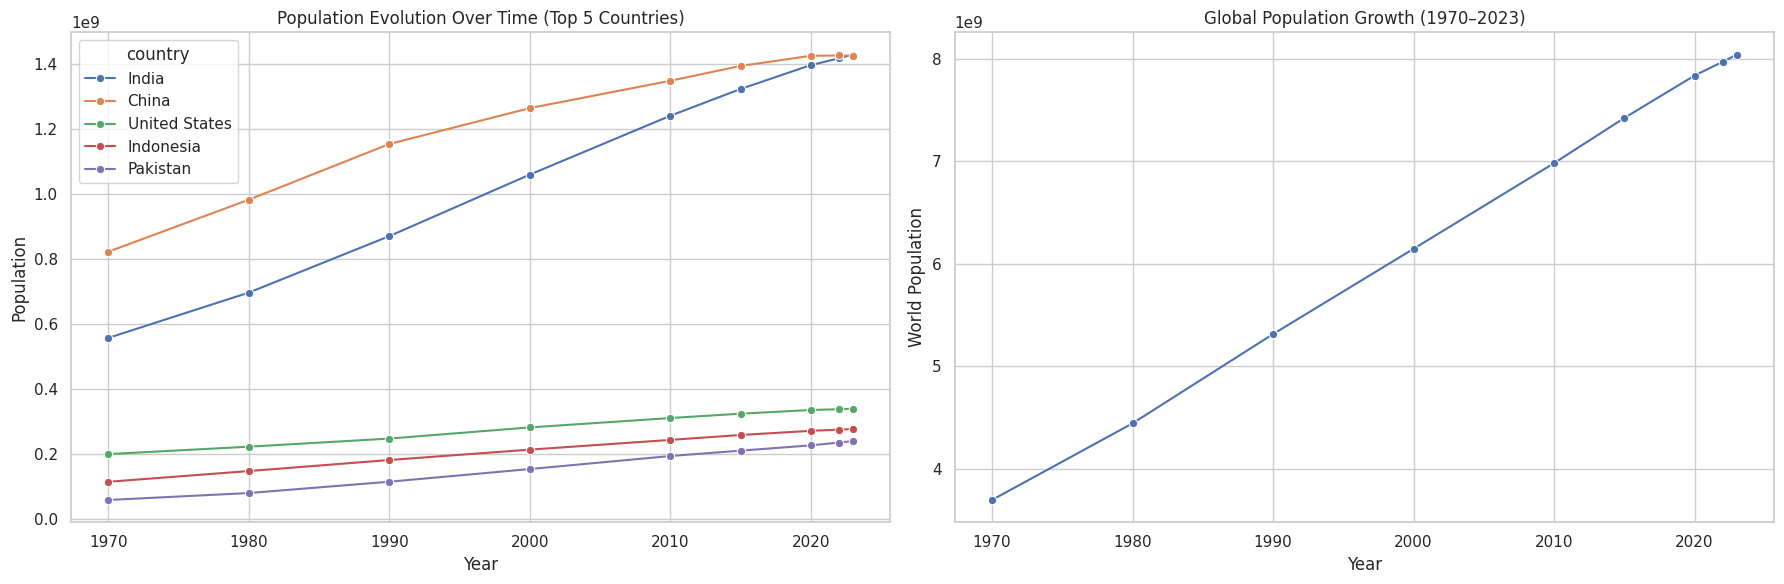

In [20]:
#data Plot 1
top_countries = dataset.nlargest(5, "2023 population")["country"].tolist()
year_cols = [
    "1970 population", "1980 population", "1990 population",
    "2000 population", "2010 population", "2015 population",
    "2020 population", "2022 population", "2023 population"
]
pop_evolution_long = dataset[dataset["country"].isin(top_countries)][["country"] + year_cols]\
    .melt(id_vars="country", var_name="Year", value_name="Population")
pop_evolution_long["Year"] = pop_evolution_long["Year"].str.split().str[0].astype(int)

#data Plot 2
years = [int(col.split()[0]) for col in year_cols]
world_pop = dataset[year_cols].sum()
evolution_df = pd.DataFrame({
    "Year": years,
    "World Population": world_pop.values
})
#define 2 pannels
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot 1 : Top 10 Most Populated Countries ---
sns.lineplot(
    data=pop_evolution_long,
    x="Year",
    y="Population",
    hue="country",
    marker="o",
    ax=axes[0]
)

axes[0].set_title("Population Evolution Over Time (Top 5 Countries)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Population")

# --- Plot 2 : Global Population Growth ---
sns.lineplot(
    data=evolution_df,
    x="Year",
    y="World Population",
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Global Population Growth (1970–2023)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("World Population")

plt.tight_layout()
plt.show()

## 2. Web Data

Source: [countryeconomy.com](https://countryeconomy.com)

The website provides comprehensive data about countries, including CO2 emissions, demographic information, and energy consumption metrics.

Data categories and their paths:

| Category | Path | Description |
|----------|------|-------------|
| CO2 emissions (total and per capita) | `energy-and-environment/co2-emissions/` | Total and per capita CO2 emissions data by country |
| Birth and fertility rates | `demography/fertility/` | Birth rates and fertility statistics |
| Electricity metrics | `energy-and-environment/electricity-consumption/` | Generation and consumption of electricity |

Note: Data is collected for each year matching the main dataset's timeframe (1970-2023)

### Web Data Structure

| Column            | Description                                  |
|-------------------|----------------------------------------------|
| country           | Country name                                 |
| year              | Data collection year                         |
| co2_total         | Total CO2 emissions for the country          |
| co2_per_capita    | CO2 emissions per person                     |
| birth_rate        | Number of births per 1000 population         |
| generation_GW     | Total electricity generation in gigawatts    |
| consumption_GW    | Total electricity consumption in gigawatts   |

In [21]:
#corpus function to scrap
URL = "https://countryeconomy.com/{info}/{country}"
KEYWEB = None
YEARS = sorted([str(i) for i in range(1970,2021, 10)] +
  [str(i) for i in range(2022,2024)] + [str(2015)], reverse=True)
LST_URI =  [
    "energy-and-environment/co2-emissions/",
    "demography/fertility/",
    "energy-and-environment/electricity-consumption/"]
ERROR = {}

def getAllCountries():
  if "local" not in datasets:
      print("Please init your dataset before")
      return None

  list_countries = [country.lower().replace(" ", "-") for country in datasets["local"]['country'].unique()]
  return list_countries

def format_url(info, country):
    formatted_url = URL
    formatted_url = formatted_url.replace("{info}", info)
    formatted_url = formatted_url.replace("{country}", country)
    return formatted_url

def openUrl(url):
  try:
      KEYWEB = urllib.request.urlopen(url)
      webContent = KEYWEB.read()
      soup = BeautifulSoup(webContent, 'html.parser')
      return soup
  except:
      return None

def parseFloat(id , lstTd, typeParse):
  if not typeParse:
      id = -(id + 1)
      if lstTd[id].text.strip() != '' and lstTd[id].text.strip() != None:
          return float(lstTd[id].text.strip().replace(",", "").replace("‰", ""))
      else:
          return None
  else:
      if lstTd[id].text.strip() != '' and lstTd[id].text.strip() != None:
          return float(lstTd[id].text.strip().replace(",", "").replace("‰", ""))
      else:
          return None

def takeInfomation(lstTd, id):
  value = []
  lstTd = lstTd[1:]
  for i in range(len(lstTd)):
      if (id == 0 and i == 1) or (id != 0 and i == 2):
          continue
      if len(lstTd) > 3 and (i == 0 or i == 1 or i == 2):
          value.append(parseFloat(i , lstTd, False))
      elif len(lstTd) <= 3:
          value.append(parseFloat(i, lstTd, True))
      else:
          continue
  return value

def foundInformation(id, website):
  infos = []
  allInformation = website.find_all("tbody")
  allInformation = allInformation[0].find_all("tr")
  if allInformation is None:
      return None
  for i in allInformation:
      line = i.find_all("td")
      if line[0].text in YEARS:
          take = takeInfomation(line, id)
          infos.append(take)
  return infos

def showError(error):
  for key, value in error.items():
      print (f"Error for {key}:")
      max_len = max([len(f"- {country}") for country in value])
      col = max_len + 4
      n_error = len(value)
      rows = (n_error + 2) // 5

      for row in range(rows):
        line = ""
        for i in range(5):
          id = row + i * rows
          if id < n_error:
            err = value[id]
            item = f"- {err.capitalize()}"
            line += item.ljust(col)
        print(line)

#Old version without threading
# def scrapWebsite():

#   countries = getAllCountries()
#   progress_bar = tqdm(countries, desc="Scraping Website")
#   for country in progress_bar:
#       progress_bar.set_description(f"Scraping Website: Processing {country}")
#       country_info = []
#       for i in range(len(LST_URI)):
#           url = format_url(LST_URI[i], country)
#           website = openUrl(url)
#           if website is None:
#               ERROR[LST_URI[i]] = ERROR.get(LST_URI[i], []) + [country]
#               continue
#           info = foundInformation(i, website)
#           if info is None:
#               ERROR["url"] = ERROR.get("url", []) + [url]
#               continue
#           if len(info) !=  len(YEARS):
#               for i in range(len(YEARS) - len(info)):
#                   info.append([None, None])
#           country_info.append(info)
#       LST_INFO_COUNTRIES[country] = country_info
#   showError(ERROR)
#   return 0

def scrapCountry(country):
  country_info = []
  error = {}
  for i in range(len(LST_URI)):
    url = format_url(LST_URI[i], country)
    website = openUrl(url)
    if website is None:
        error[LST_URI[i]] = error.get(LST_URI[i], []) + [country]
        continue
    info = foundInformation(i, website)
    if info is None:
        error["url"] = error.get("url", []) + [url]
        continue
    if len(info) != len(YEARS):
        for _ in range(len(YEARS) - len(info)):
            info.append([None, None])
    country_info.append(info)
  return country, country_info, error


def scrapWebsiteFaster():
  countries = getAllCountries()
  lst_info = {}
  allError = {}

  with ThreadPoolExecutor(max_workers=20) as executor:
    futures = {executor.submit(scrapCountry, c): c for c in countries}

  for future in futures:
      country, info, errors = future.result()

      lst_info[country] = info

      for key, val in errors.items():
          allError.setdefault(key, []).extend(val)
  showError(allError)
  return lst_info


def TransformToDataFrame():
  allInfo = scrapWebsiteFaster()

  categories = ['co2_total', 'co2_per_capita', 'birth_rate', 'fertility_rate', 'generation_GW', 'consumption_GW']

  data = []
  for country, country_data in allInfo.items():
      row = {'country': country}

      for id_category, category in enumerate(country_data):
          if category:
              start_categories = id_category * 2
              category_categories = categories[start_categories:start_categories + 2]
              for id_year, year in enumerate(YEARS):
                  if id_year < len(category):
                      year_values = category[id_year]
                      for id_subcategory, subcategory in enumerate(category_categories):
                          if id_subcategory < len(year_values):
                              col_name = f"{subcategory}_{year}"
                              row[col_name] = year_values[id_subcategory]

      data.append(row)
  df = pd.DataFrame(data)

  columns = ['country']
  for category in categories:
      for year in YEARS:
          columns.append(f"{category}_{year}")

  df = df[columns]

  return df



In [22]:
datasets['web'] = TransformToDataFrame()
dataset_web = datasets['web']

dataset_web.head()

Error for energy-and-environment/co2-emissions/:
- Dr-congo                            - Macau                               - Guam                                - Faroe-islands                       - Cook-islands                        
- Myanmar                             - Montenegro                          - Micronesia                          - Northern-mariana-islands            - Anguilla                            
- South-sudan                         - Cape-verde                          - Jersey                              - Saint-kitts-and-nevis               - Nauru                               
- Serbia                              - Western-sahara                      - Aruba                               - Turks-and-caicos-islands            - Wallis-and-futuna                   
- Republic-of-the-congo               - Maldives                            - Saint-vincent-and-the-grenadines    - Sint-maarten                        - Tuvalu                           

,country,co2_total_2023,co2_total_2022,co2_total_2020,co2_total_2015,co2_total_2010,co2_total_2000,co2_total_1990,co2_total_1980,co2_total_1970,...,generation_GW_1970,consumption_GW_2023,consumption_GW_2022,consumption_GW_2020,consumption_GW_2015,consumption_GW_2010,consumption_GW_2000,consumption_GW_1990,consumption_GW_1980,consumption_GW_1970
0,india,2955.182,2740.821,2318.948,2260.131,1743.693,995.653,600.687,303.576,213.934,...,NaN,1518661.0,1460156.0,1247791.0,1111964.0,727511.0,383924.0,219879.0,97898.0,NaN
1,china,13259.639,12526.826,12022.433,10776.913,9134.072,3666.951,2414.280,1563.216,909.976,...,NaN,8920321.0,8345973.0,7385493.0,5509540.0,3716554.0,1178033.0,549342.0,261492.0,NaN
2,united-states,4682.039,4786.631,4466.043,5133.220,5521.769,5928.971,4983.811,4780.428,4595.063,...,NaN,4084578.0,4128177.0,3897899.0,3914299.0,3889290.0,3592473.0,2837119.0,2094449.0,NaN
3,indonesia,674.536,656.669,594.263,512.407,443.706,299.092,161.778,90.574,31.099,...,NaN,356135.0,349777.0,268424.0,242452.0,145058.0,77670.0,38497.0,11299.0,NaN
4,pakistan,200.510,218.680,222.472,178.255,155.627,111.866,65.622,29.020,17.848,...,NaN,145357.0,144327.0,123304.0,96053.0,79436.0,46854.0,30540.0,10157.0,NaN


# Explore Web Dataset

## Plot 1: Global CO₂ Emissions

This plot shows the evolution of global CO₂ emissions from 1970 to 2023.  
By summing the total CO₂ emissions of all countries, we can observe how worldwide emissions have changed over time.

---

## Plot 2: Global Electricity Consumption (GW)

This plot illustrates the evolution of global electricity consumption from 1970 to 2023.  
By aggregating the electricity consumption of all countries, we can see how global energy demand has increased across the decades.


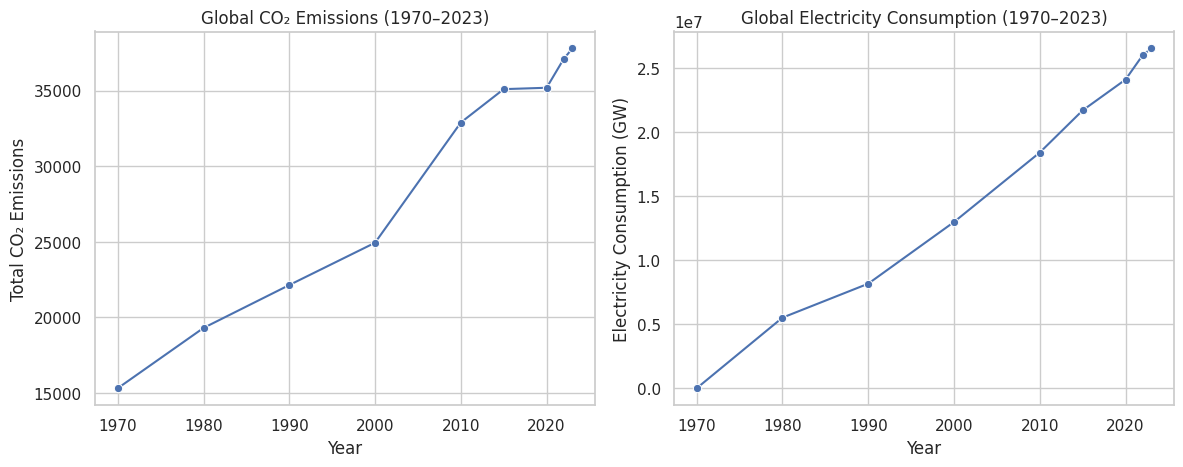

In [28]:
df = dataset_web.copy()

years = YEARS  # déjà définis

world_co2 = []
world_elec = []

for year in years:
    co2_col = f"co2_total_{year}"
    elec_col = f"consumption_GW_{year}"

    world_co2.append(df[co2_col].sum(skipna=True))
    world_elec.append(df[elec_col].sum(skipna=True))

world_df = pd.DataFrame({
    "Year": [int(y) for y in years],
    "CO2_total": world_co2,
    "Electricity_consumption_GW": world_elec
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot 1 : Global CO2 Emissions ---
sns.lineplot(
    data=world_df,
    x="Year",
    y="CO2_total",
    marker="o",
    ax=axes[0]
)
axes[0].set_title("Global CO₂ Emissions (1970–2023)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total CO₂ Emissions")

# --- Plot 2 : Global Electricity Consumption ---
sns.lineplot(
    data=world_df,
    x="Year",
    y="Electricity_consumption_GW",
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Global Electricity Consumption (1970–2023)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Electricity Consumption (GW)")

plt.tight_layout()
plt.show()

## 3. Combined Dataset Structure

This dataset merges key information from both sources to analyze the relationship between population growth, CO2 emissions, and energy consumption. It enables the study of potential correlations between demographic changes and environmental impacts across different countries and years.

| country | year | population | co2_total | co2_per_capita | birth_rate | generation_GW | consumption_GW |
|---------|------|------------|-----------|----------------|------------|---------------|----------------|
| france  | 1970 | xxx        | xxx       | xxx           | xxx        | xxx           | xxx           |
| germany | 1970 | xxx        | xxx       | xxx           | xxx        | xxx           | xxx           |
| ...     |      |            |           |               |            |               |               |

### Available Metrics

- **Population**: Total number of inhabitants in the country
- **CO2 Total**: Total CO2 emissions for the country (in metric tons)
- **CO2 per Capita**: CO2 emissions per person (in metric tons)
- **Birth Rate**: Number of births per 1000 population
- **Electricity Generation**: Total electricity production in gigawatts (GW)
- **Electricity Consumption**: Total electricity consumption in gigawatts (GW)

In [ ]:
def setStartupParameters():
    datasets['local']['country'] = datasets['local']['country'].str.lower()
    datasets['web']['country'] = datasets['web']['country'].str.lower()
    years = sorted([col.replace(" population", "") for col in datasets['local'].columns
                    if "population" in col])
    metrics = ['population', 'co2_total', 'co2_per_capita', 'birth_rate',
                'fertility_rate', 'generation_GW', 'consumption_GW']
    countries = set(datasets['local']['country']) & set(datasets['web']['country'])
    return years, metrics, countries

def createMergedDataFrame(merged_df):
    print("create dataframe")
    country_col = merged_df.pop('country') #remove coountry name value
    merged_df.index = country_col #set country name value like index
    cols = [col for col in merged_df.columns if isinstance(col, tuple)]
    merged_df.columns = pd.MultiIndex.from_tuples(cols, names=['metric', 'year'])
    merged_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
    datasets["merged"] = merged_df

def mergeDatasets():
    if "local" not in datasets or "web" not in datasets:
        print("Please init both datasets before merging")
        return 1
    data = []
    years, metrics, countries = setStartupParameters()
    for country in countries:
        local_data = datasets['local'][datasets['local']['country'] == country] #use mask to return when the correct row
        web_data = datasets['web'][datasets['web']['country'] == country]
        if not local_data.empty and not web_data.empty:
            row_data = {'country': country}
            if 'area (km²)' in local_data:
                area = local_data['area (km²)'].iloc[0]
            row_data[('area (km²)', '')] = area
            for year in years:
                pop_col = f"{year} population"
                if pop_col in local_data.columns:
                    row_data[('population', year)] = local_data[pop_col].iloc[0]

                for metric in metrics[1:]:
                    col_name = f"{metric}_{year}"
                    if col_name in web_data.columns:
                        row_data[(metric, year)] = web_data[col_name].iloc[0]
            data.append(row_data)

    merged_df = pd.DataFrame(data)
    if merged_df.empty:
        print("\nERROR: Merge resulted in empty dataset!")
        return 1
    createMergedDataFrame(merged_df)

In [ ]:
mergeDatasets()
dataset_merged = datasets['merged']
dataset_merged.fillna(0.0, inplace=True) #raplec NaN by 0.0
dataset_merged.head()

#Visualisation

In [ ]:
years = [col for col in dataset_merged.columns.levels[1] if col != ""]
years = sorted(years, key=lambda x: int(x))
world_population = []
world_co2 = []

for year in years:
    world_population.append( dataset_merged["population"][year].sum())
    world_co2.append(dataset_merged["co2_total"][year].sum())

pop_norm = (np.array(world_population) - min(world_population)) / (max(world_population) - min(world_population))
co2_norm = (np.array(world_co2) - min(world_co2)) / (max(world_co2) - min(world_co2))

world_dataset = pd.DataFrame({
    "Year": [int(y) for y in years],
    "Population": pop_norm,
    "CO2_total": co2_norm
})

plt.figure(figsize=(14, 6))

sns.lineplot(data=world_dataset, x="Year", y="Population", marker="o", label="Population (normalized)")
sns.lineplot(data=world_dataset, x="Year", y="CO2_total", marker="o", label="CO₂ Emissions (normalized)")

plt.title("Global Population vs CO₂ Emissions (Both on Same Plot)")
plt.ylabel("Normalized Scale (0–1)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

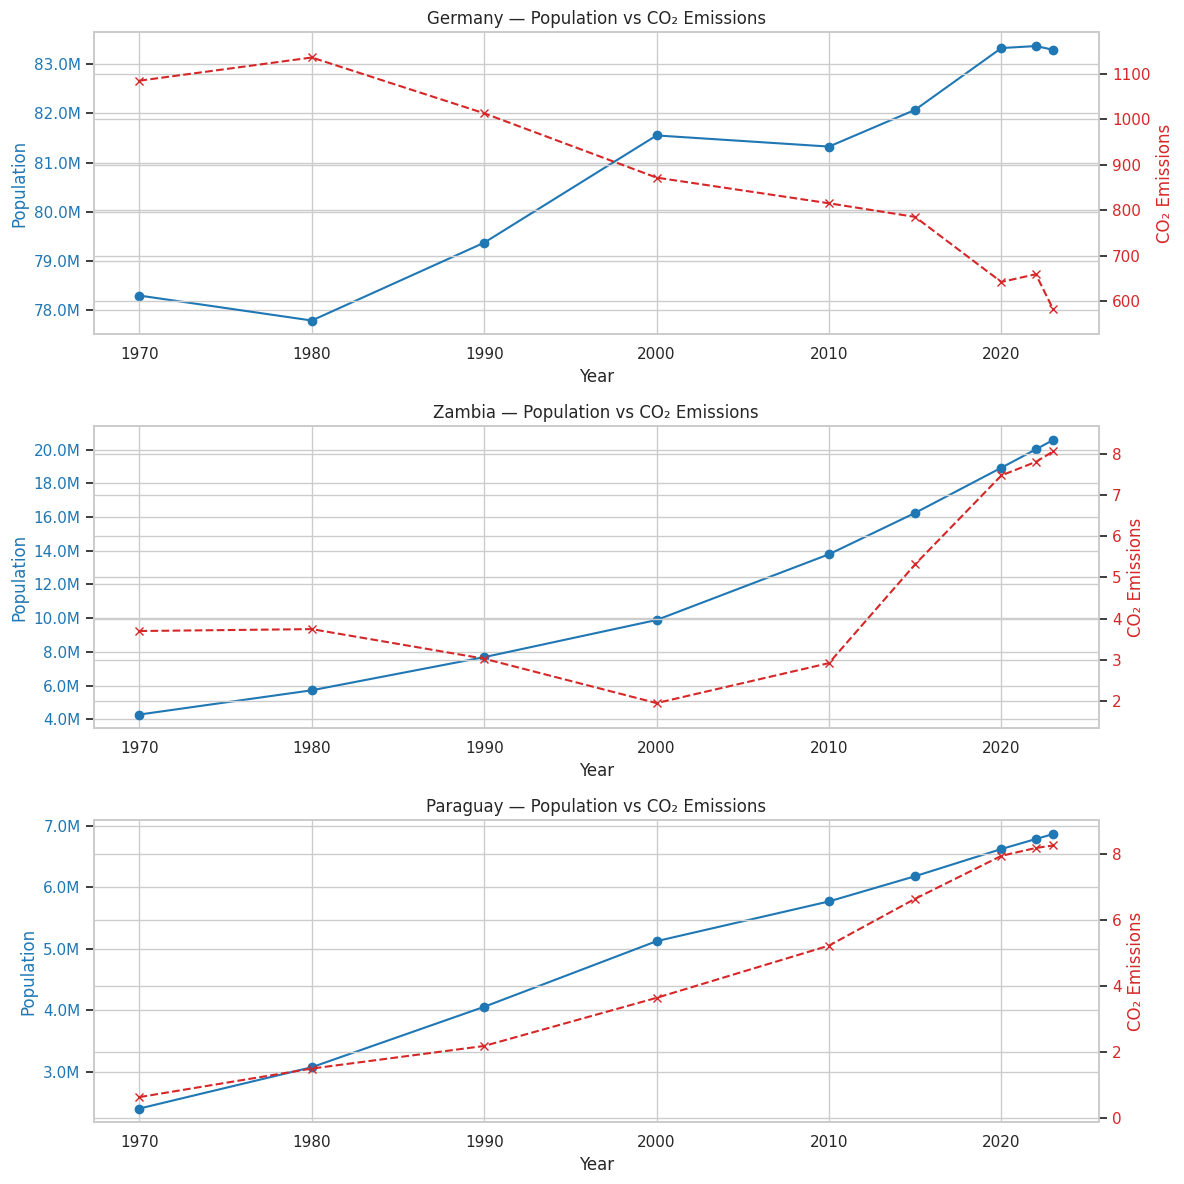

In [30]:
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

countries = ["germany", "zambia", "paraguay"]
years = [col for col in dataset_merged.columns.levels[1] if col != ""]
years = sorted(years, key=lambda x: int(x))
years_int = [int(y) for y in years]

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for idx, country in enumerate(countries):

    ax_pop = axes[idx]
    ax_co2 = ax_pop.twinx()

    # extract values
    population = [dataset_merged.loc[country, ("population", y)] for y in years]
    co2 = [dataset_merged.loc[country, ("co2_total", y)] for y in years]

    # plot population
    ax_pop.plot(years_int, population, marker="o", linestyle="-",
                color="tab:blue", label=f"{country} — Population")
    ax_pop.set_ylabel("Population", color="tab:blue")
    ax_pop.tick_params(axis="y", labelcolor="tab:blue")
    ax_pop.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

    # plot CO2
    ax_co2.plot(years_int, co2, marker="x", linestyle="--",
                color="tab:red", label=f"{country} — CO₂")
    ax_co2.set_ylabel("CO₂ Emissions", color="tab:red")
    ax_co2.tick_params(axis="y", labelcolor="tab:red")

    # --- FIX the CO2 scale properly ---
    co2_min = min(co2)
    co2_max = max(co2)
    margin = (co2_max - co2_min) * 0.10
    ax_co2.set_ylim(co2_min - margin, co2_max + margin)

    # Titles
    ax_pop.set_title(f"{country.capitalize()} — Population vs CO₂ Emissions")
    ax_pop.set_xlabel("Year")

plt.tight_layout()
plt.show()


### Growing Population and CO₂ Emissions

If you have plotted different graphs and compared several countries, you may have already noticed that a growing population is not necessarily the main factor influencing CO₂ emissions. A good example is to look at a graph including *Germany*, *Bulgaria*, and *Zambia*.

For *Paraguay*, the population curve and the CO₂ emissions curve stay relatively close across time. At first sight, this could suggest that population is the primary driver of CO₂ emissions. However, when observing the plots for *Germany* and *Zambia*, this assumption no longer holds: *Germany’s* emissions continue to decrease even though its population grows, and *Zambia* shows an even more interesting pattern, with emissions decreasing around 2000 before rising again in 2010/2015 and reaching a stable level—yet population keeps increasing.

This shows that for every country in the world, CO₂ emissions may be influenced by population, but also by many other factors such as environmental laws, energy policies, industrial development, and the efforts made by governments to fight climate change.


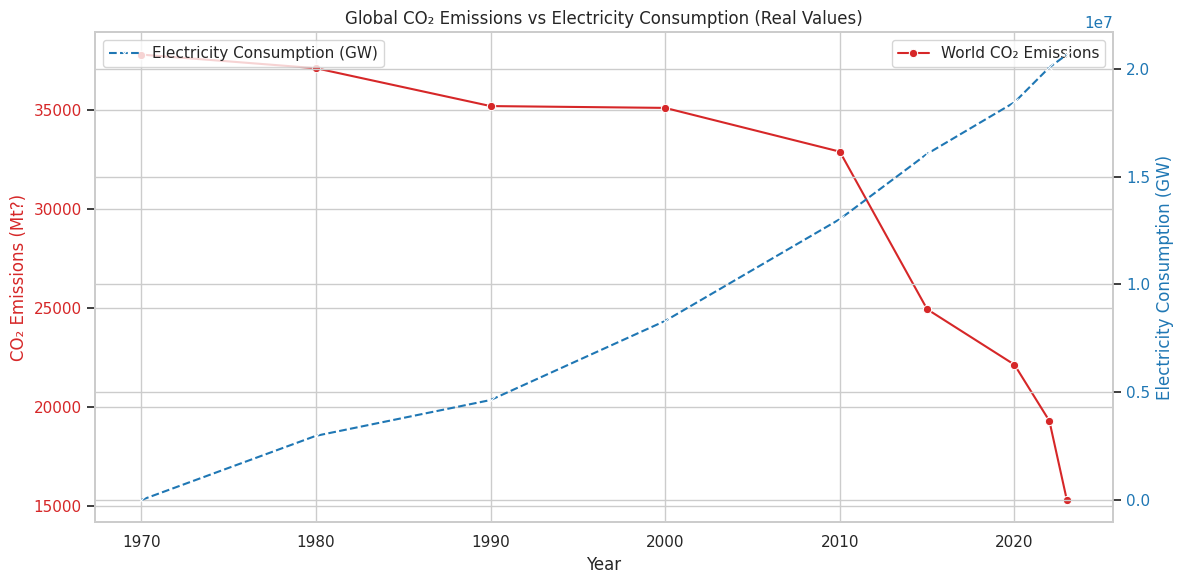

In [38]:
world_elec = [dataset_merged["consumption_GW"][y].sum() for y in years]
world_energy = [dataset_merged["consumption_GW"][y].sum() for y in years]

df_elec_co2_real = pd.DataFrame({
    "Year": years_int,
    "CO2_total": world_co2,
    "Electricity": world_elec
})

plt.figure(figsize=(12, 6))

# CO₂ = RED curve
ax1 = sns.lineplot(data=df_elec_co2_real, x="Year", y="CO2_total",
                   marker="o", color="tab:red", label="World CO₂ Emissions")
ax1.set_ylabel("CO₂ Emissions (Mt?)", color="tab:red")
ax1.tick_params(axis='y', labelcolor='tab:red')

# Electricity consumption = BLUE (SECOND AXIS)
ax2 = ax1.twinx()
sns.lineplot(data=df_elec_co2_real, x="Year", y="Electricity",
             marker="x", linestyle="--", color="tab:blue",
             label="Electricity Consumption (GW)", ax=ax2)
ax2.set_ylabel("Electricity Consumption (GW)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Global CO₂ Emissions vs Electricity Consumption (Real Values)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Generation and Emissions

For electricity data analysis, we compare global electricity generation with global CO₂ emissions.  
What we observe is very clear: **the two curves evolve in completely different directions**.  
While **global CO₂ emissions decrease over time**, **electricity generation continues to increase**.

From this comparison, we can conclude that **electricity production is not a direct or dominant factor influencing CO₂ emissions worldwide**.  
This makes sense, as many countries increasingly rely on **renewable and low-carbon energy sources**, which allows electricity generation to grow without necessarily increasing total emissions.


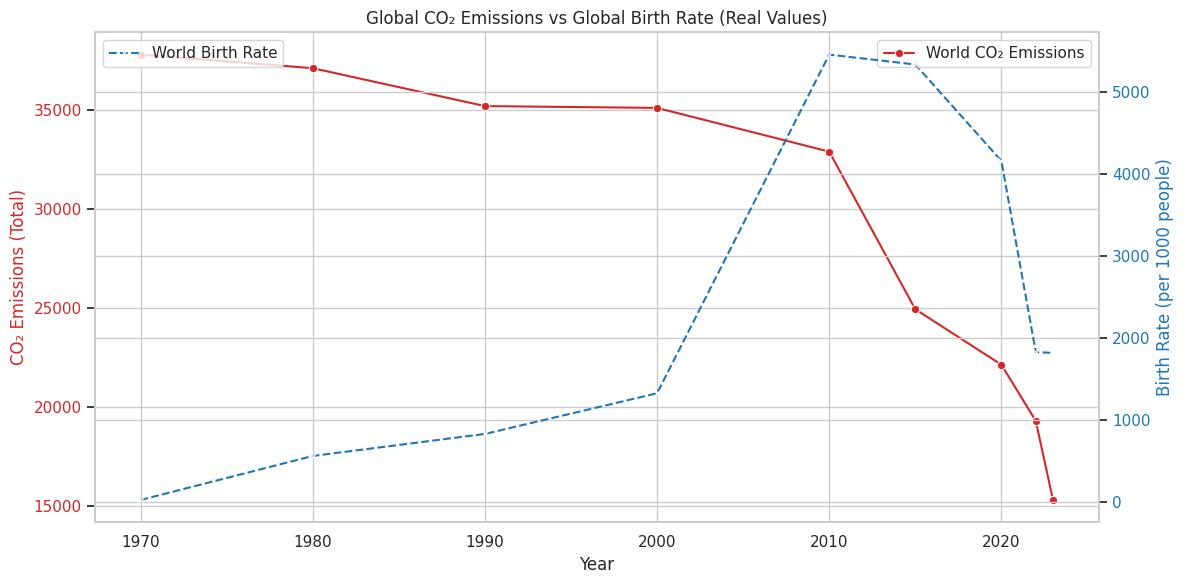

In [44]:
world_birth_rate = [dataset_merged["birth_rate"][y].mean() for y in years]


df_co2_birth_real = pd.DataFrame({
    "Year": years_int,
    "CO2": world_co2,
    "BirthRate": world_birth_rate
})

plt.figure(figsize=(12, 6))

# CO2 = curve RED
ax1 = sns.lineplot(
    data=df_co2_birth_real, x="Year", y="CO2",
    marker="o", color="tab:red", label="World CO₂ Emissions"
)
ax1.set_ylabel("CO₂ Emissions (Total)", color="tab:red")
ax1.tick_params(axis='y', labelcolor='tab:red')

# Birth Rate = curve BLUE
ax2 = ax1.twinx()
sns.lineplot(
    data=df_co2_birth_real, x="Year", y="BirthRate",
    marker="x", linestyle="--", color="tab:blue",
    label="World Birth Rate", ax=ax2
)
ax2.set_ylabel("Birth Rate (per 1000 people)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Global CO₂ Emissions vs Global Birth Rate (Real Values)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Birth Rate and CO₂ Emissions

On this plot, we can observe that the global birth rate evolves independently from CO₂ emissions for several decades.  
However, when CO₂ emissions start to decrease, the global birth rate also begins to decline.  
This suggests that the two variables may share an indirect connection.

The relationship between these two indicators is interesting because, from a common-sense perspective, it is more likely that **CO₂ emissions influence birth rate trends**, rather than the birth rate directly influencing global CO₂ emissions.